In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output
#pylab.rcParams['figure.figsize'] = (8.0, 10.0)
pylab.rcParams['figure.figsize'] = (20, 10)

In [2]:
from pathlib import Path
tsr_ex_dir ='./tsr_ex/project_0/task_0'
tsr_dir ='./tsr/project_0/task_0'
Kaggle_dir = './results/Kaggle2/'
las_dir ='./results/Lasvegas Taxi/'

dataDir=tsr_ex_dir
#dataDir=tsr_dir
annFile='{}/annotations/instances_default.json'.format(dataDir)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)
cats = coco.loadCats(coco.getCatIds())
names=[cat['name'] for cat in cats]
print('COCO categories names: \n{}\n'.format(', '.join(names)))

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: './tsr_ex/project_0/task_0/annotations/instances_default.json'

In [ ]:
# Select label & image
#catIds = coco.getCatIds(catNms=['Stop sign - Oct']); 
#_catNms = names[:1]
_catNms = ['Stop sign - Oct']
catIds = coco.getCatIds(catNms=_catNms);
imgIds = coco.getImgIds(catIds=catIds);
print("the number of images :",len(imgIds))
print("images index = [%d-%d]"%(min(imgIds), max(imgIds)))
imgIds.sort()
imgIds

In [4]:
button_prev = widgets.Button(description='Prev Images')
button_next = widgets.Button(description='Next Images')
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(imgIds)-1,
    continuous_update=False,
    step=1,)
text = widgets.Text(
    value='0',
    description='img number',
    continuous_update=False, )
out = widgets.Output()
img_k = 0

def img_prev(_):
    with out:
        clear_output()
        global img_k
        img_k -= 1
        img = coco.loadImgs(imgIds[img_k])[0]
        I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
        _annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(_annIds)
        print("annos: ",anns)
        plt.imshow(I); plt.axis('off')
        coco.showAnns(anns, draw_bbox=True)
        plt.show()
        
def img_next(_):
    with out:
        clear_output()
        global img_k
        img_k += 1
        img = coco.loadImgs(imgIds[img_k])[0]
        I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
        _annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(_annIds)
        print("annos: ",anns)
        plt.imshow(I); plt.axis('off')
        coco.showAnns(anns, draw_bbox=True)
        plt.show()

def img_slide(_):
    with out:
        clear_output()
        global img_k
        img_k = slider.value
        img = coco.loadImgs(imgIds[img_k])[0]
        I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
        _annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(_annIds)
        print("annos: ",anns)
        plt.imshow(I); plt.axis('off')
        coco.showAnns(anns, draw_bbox=True)
        plt.show()

def img_num(_):
    with out:
        clear_output()
        #global img_k
        img_k = int(text.value)
        img = coco.loadImgs(imgIds[img_k])[0]
        I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
        _annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(_annIds)
        print("annos: ",anns)
        plt.imshow(I); plt.axis('off')
        coco.showAnns(anns, draw_bbox=True)
        plt.show()
        dir(self)
        
# linking button and function together using a button's method
button_prev.on_click(img_prev)
button_next.on_click(img_next)
slider.observe(img_slide)
text.observe(img_num)

# make interactive boxes
button_box = widgets.HBox([button_prev,button_next])
slide_box = widgets.HBox([slider])
text_box = widgets.HBox([text])
total_box = widgets.VBox([button_box, slide_box, text_box, out])
display(total_box)

NameError: name 'imgIds' is not defined

img:  {'id': 0, 'width': 1360, 'height': 800, 'license': 0, 'file_name': 'project_0/task_0/images/kaggle2-ts1_9.jpg', 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
annos:  [{'id': 0, 'image_id': 0, 'category_id': 1, 'segmentation': [], 'area': 1089.0, 'bbox': [290.0, 389.0, 33.0, 33.0], 'iscrowd': 0, 'attributes': {'Color': 'Red', 'occluded': False}}, {'id': 1, 'image_id': 0, 'category_id': 1, 'segmentation': [], 'area': 1024.0, 'bbox': [822.0, 361.0, 32.0, 32.0], 'iscrowd': 0, 'attributes': {'Color': 'Red', 'occluded': False}}]


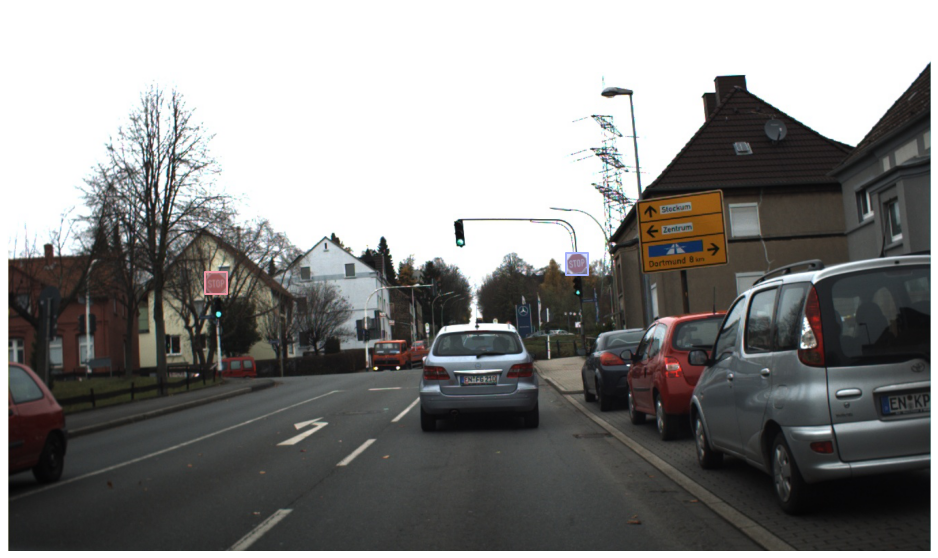

In [19]:
img = coco.loadImgs(imgIds[0])[0]

# load and display image
I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
#plt.axis('off'); plt.imshow(I); plt.show()

# load and display instance annotations
#catIds_ = coco.getCatIds(catNms=['traffic light','stop sign'])
catIds_ = catIds
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds_, iscrowd=None)
anns = coco.loadAnns(annIds)
print("img: ",img)
print("annos: ",anns)
plt.imshow(I); plt.axis('off')
coco.showAnns(anns, draw_bbox=True)

In [15]:
## The end ##